<b style="background-color:tomato;">
   <h1 style="background-color:tomato;font-size:300%;text-align:center;" > Filght Price Prediction </h1>
</b>

<img src="https://unsplash.com/photos/0IuDrKgK1Fo" alt="Flowers in Chania">

In [1]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/flight-fare-prediction-mh/Data_Train.xlsx
/kaggle/input/flight-fare-prediction-mh/Sample_submission.xlsx
/kaggle/input/flight-fare-prediction-mh/Test_set.xlsx


In [2]:
!pip install plotly --upgrade --quiet

In [3]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
import xgboost


from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


# Fig settings

plt.style.use('seaborn-poster')
plt.style.use("fivethirtyeight")
plt.rcParams['font.family'] = 'serif'

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [4]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Loading and understanding the Data

In [5]:
# Load Data sets

train_df = pd.read_excel('/kaggle/input/flight-fare-prediction-mh/Data_Train.xlsx')
test_df = pd.read_excel('/kaggle/input/flight-fare-prediction-mh/Test_set.xlsx')

In [6]:
# Shape and size of data sets 

print('train size',train_df.shape)
print('test size',test_df.shape)

train size (10683, 11)
test size (2671, 10)


In [7]:
# Top 5 rows of train set
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
# Top 5 rows of train set
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [9]:
# Info of train data 


train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
# Info of test data 


test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [11]:
# Checking null value in train set

train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There are only two nan value in train set one in  Route column and other in Total_Stops

In [12]:
# Checking null value in test set

test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

Test set is clear 

In [13]:
# Since there are only two nan we can drop them 


train_df = train_df.dropna(axis=0)

## Visualization 

In [14]:
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
train_df['Airline'].unique()  # unique values in Airline column

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [16]:
fig = px.box(
            train_df,
            x='Price',
            y='Airline',
            color='Airline',
            template='plotly_dark',
            title='Airlines price distributions',)


fig.update_layout(
            autosize=False,
            width=950,
            height=1200,)

**insights**
* Jet Airways Bussiness has highest fare.
* Trujet has negligible distribution


In [17]:
fig = px.box(
            train_df,
            x='Price',
            y='Source',
            color='Source',
            template='plotly_dark',
            title='price distribution by Source',)


fig.update_layout(
            autosize=False,
            width=950,
            height=1000,)

In [18]:
fig = px.box(
            train_df,
            x='Price',
            y='Destination',
            color='Destination',
            template='plotly_dark',
            title='price distribution by Destination',)


fig.update_layout(
            autosize=False,
            width=950,
            height=1000,)

In [19]:
# Replace New delhi to Delhi because they are same ( Step one for pipeline )

def replace_new_delhi(df):
    # replace New Delhi to Delhi 
    df.apply(pd.Series.replace, to_replace='New Delhi', value='Delhi',inplace=True)
    # returning canged Data set
    return df
    
replace_new_delhi(train_df)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [20]:
train_df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [21]:
train_df['Route'].nunique()

128

[Text(0.5, 1.0, 'Top 20 Route by Price')]

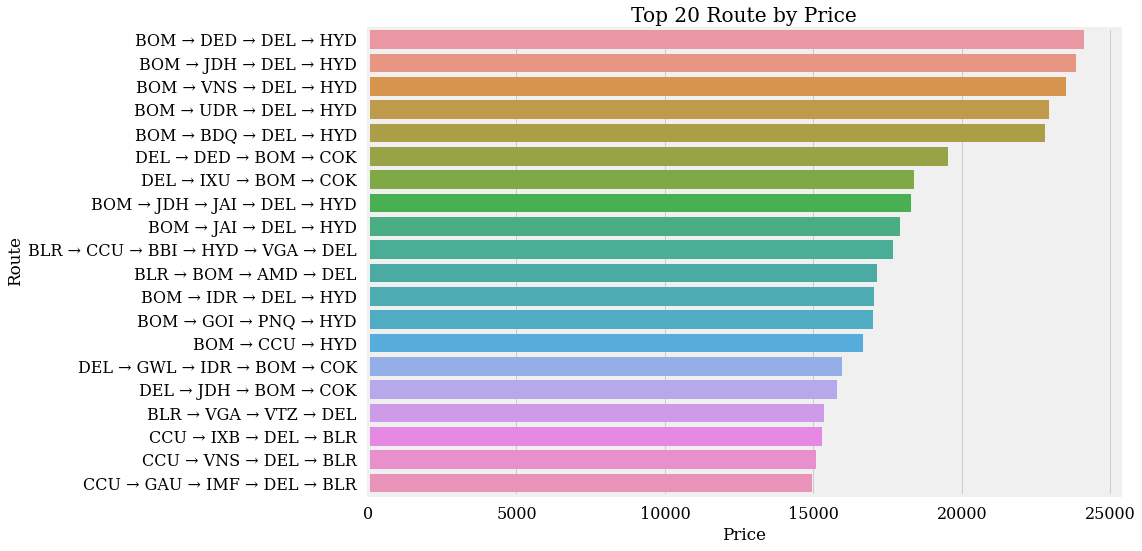

In [22]:
route = train_df.groupby("Route")['Price'].median().to_frame().sort_values("Price",ascending=False).reset_index()

sns.barplot(
            data=route.head(20),
            x='Price',
            y='Route',
).set(title='Top 20 Route by Price')

In [23]:
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [24]:
train_df.groupby(['Source', 'Destination'], as_index=False)['Price'].median()

,Source,Destination,Price
0,Banglore,Delhi,6121.0
1,Chennai,Kolkata,3850.0
2,Delhi,Cochin,10262.0
3,Kolkata,Banglore,9345.0
4,Mumbai,Hyderabad,3342.0


<AxesSubplot:xlabel='Price', ylabel='Total_Stops'>

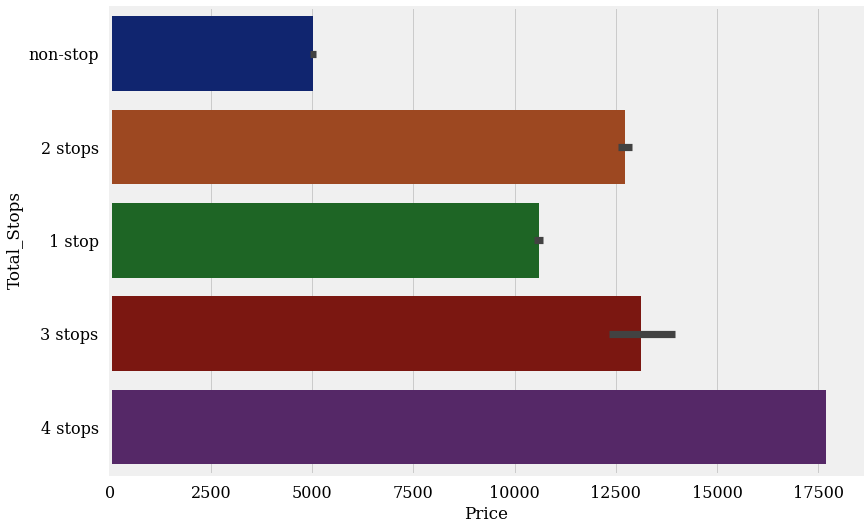

In [25]:
sns.barplot(
            data=train_df,
            y='Total_Stops',
            x="Price",
            palette='dark')

Price also depend on Total_Stops. \
we are now converting it into integer

#### Pipe step 2

In [26]:
train_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [27]:
## Converting Total_Stops columns into integers ( second step for pipeline)


def extract_stops(df):
    df['Total_Stops']=df['Total_Stops'].map(
                                            {'non-stop':0,
                                             '2 stops':2,
                                             '1 stop':1,
                                             '3 stops':3,
                                             '4 stops':4})
    return df


extract_stops(train_df)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,No info,7229
10681,Vistara,01/03/2019,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,0,No info,12648


In [28]:
# train_df['Duration'].to_datetime()

train_df.sample(4)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
3629,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,07:40 07 Mar,27h 40m,1,No info,12940
276,Air India,27/03/2019,Mumbai,Hyderabad,BOM → HYD,06:20,07:40,1h 20m,0,No info,2575
5333,Vistara,15/05/2019,Kolkata,Banglore,CCU → DEL → BLR,07:10,23:25,16h 15m,1,No info,9345
5778,IndiGo,1/06/2019,Delhi,Cochin,DEL → HYD → COK,06:50,12:10,5h 20m,1,No info,5298


In [29]:
len(train_df['Duration'][0].split())

2

In [30]:
# Handel duration columns extract no. of minute from from duration ( Step 3 for pipeline)
def duration_handling(df):
    duration=list(df['Duration'])
    for i in range(len(duration)):
        if len(duration[i].split(' '))==2: # if lenght is 2 that mean we  hour both hours and minutes
            pass
        else:
            if 'h' in duration[i]: # Check if duration contains only hour
                 duration[i]=duration[i] + ' 0m' # Adds 0 minute
            else:
                 duration[i]='0h '+ duration[i]  # Adds 0 hours
    Total_min_t = []
    for i in range(len(duration)):
        hours = int(duration[i].split(' ')[0][:-1])*60 # Convert hours into min 
        mins = int(duration[i].split(' ')[1][:-1])
        Total_min = hours + mins
        Total_min_t.append(Total_min)
    df['Total_duration_min']=Total_min_t
    return df

In [31]:
# pass train_df from function


duration_handling(train_df).head() # As it will return DataFrame we use head function ere

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Total_duration_min
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,325
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,285


### Extract date, month, and weekday from Journey columm( Step 4 for pipeline)

In [32]:
### Extract date, month, and weekday from Journey columm( Step 4 for pipeline)

def journey_day(df):
        df['Journey_Day'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.day
        df['Journey_Month'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.month
        df['weekday']= pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.weekday
        return df

In [33]:
journey_day(train_df).head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Total_duration_min,Journey_Day,Journey_Month,weekday
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,170,24,3,6
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,445,1,5,2
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,1140,9,6,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,325,12,5,6
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,285,1,3,4


### Extract Arrival time and Departure time

In [34]:
### Extract Arrival time and Departure time


def Arrival_and_dep(df):
        # Arrival_time
        df['Arrival_hour'] = pd.to_datetime(df.Arrival_Time).dt.hour
        df['Arrival_min'] = pd.to_datetime(df.Arrival_Time).dt.minute
        
        #
        df['Dep_hour'] = pd.to_datetime(df.Dep_Time).dt.hour
        df['Dep_min'] = pd.to_datetime(df.Dep_Time).dt.minute
        return df

In [35]:
## passing from function

Arrival_and_dep(train_df).head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Total_duration_min,Journey_Day,Journey_Month,weekday,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,170,24,3,6,1,10,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,445,1,5,2,13,15,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,1140,9,6,6,4,25,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,325,12,5,6,23,30,18,5
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,285,1,3,4,21,35,16,50


In [36]:

px.bar(
            train_df.groupby('Journey_Month')['Price'].mean().to_frame().reset_index(),
            x='Journey_Month',
            y='Price',
            template = 'plotly_dark',
            title='Journey_Month vs Price'

        )

In [37]:

px.bar(
            train_df.groupby('Journey_Day')['Price'].mean().to_frame().reset_index(),
            x='Journey_Day',
            y='Price',
            template = 'plotly_dark',
            title='Journey_Day vs Price'

        )

In [38]:

px.bar(
            train_df.groupby('weekday')['Price'].mean().to_frame().reset_index(),
            x='weekday',
            y='Price',
            template = 'plotly_dark',
            title='weekday vs Price'

        )

In [39]:
train_df.columns


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Total_duration_min', 'Journey_Day',
       'Journey_Month', 'weekday', 'Arrival_hour', 'Arrival_min', 'Dep_hour',
       'Dep_min'],
      dtype='object')

In [40]:

px.bar(
            train_df.groupby('Dep_hour')['Price'].mean().to_frame().reset_index(),
            x='Dep_hour',
            y='Price',
            template = 'plotly_dark',
            title='Dep_hour vs Price'

        )


In [41]:

px.bar(
            train_df.groupby('Arrival_hour')['Price'].mean().to_frame().reset_index(),
            x='Arrival_hour',
            y='Price',
            template = 'plotly_dark',
            title='Arrival_hour vs Price'

        )


In [42]:
## Now next is all preprocessing

In [43]:

px.bar(
            train_df.groupby('Additional_Info')['Price'].mean().to_frame().reset_index(),
            x='Additional_Info',
            y='Price',
            template = 'plotly_dark',
            title='Additional_Info vs Price'

        )


**insights**
* Price also depend upon `Additional_Info`column
* There are promble there to No info one capital I another one with small i we can make them same or we can leave them as it is 

In [44]:
test_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Long layover', 'Business class',
       'Change airports'], dtype=object)

In [45]:
train_df.apply(pd.Series.replace, to_replace='No Info', value='No info',inplace=True)

Airline               None
Date_of_Journey       None
Source                None
Destination           None
Route                 None
Dep_Time              None
Arrival_Time          None
Duration              None
Total_Stops           None
Additional_Info       None
Price                 None
Total_duration_min    None
Journey_Day           None
Journey_Month         None
weekday               None
Arrival_hour          None
Arrival_min           None
Dep_hour              None
Dep_min               None
dtype: object

In [46]:
train_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

### select column 

In [47]:
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Total_duration_min', 'Journey_Day',
       'Journey_Month', 'weekday', 'Arrival_hour', 'Arrival_min', 'Dep_hour',
       'Dep_min'],
      dtype='object')

In [48]:
y = train_df['Price']

def input_cols(df):
    input_cols = ['Airline', 'Source', 'Destination', 'Total_Stops',
       'Additional_Info', 'Total_duration_min', 'Journey_Day',
       'Journey_Month', 'weekday', 'Arrival_hour', 'Dep_hour',]
    X = df[input_cols].copy()
    return X

In [49]:
X=input_cols(train_df)

In [50]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.33, random_state=42)



In [51]:
X_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Total_duration_min,Journey_Day,Journey_Month,weekday,Arrival_hour,Dep_hour
4585,Jet Airways,Kolkata,Banglore,1,In-flight meal not included,750,12,6,2,22,9
3228,Jet Airways,Delhi,Cochin,2,No info,1125,12,6,2,4,9
5324,Jet Airways,Kolkata,Banglore,1,In-flight meal not included,1025,15,5,2,12,18
539,IndiGo,Kolkata,Banglore,0,No info,155,1,4,0,7,4
6110,Jet Airways,Kolkata,Banglore,1,No info,1330,9,5,3,4,6


#### Encoding 

In [52]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['Airline','Source','Destination','Additional_Info']

In [53]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(X_train[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))

In [54]:
X_train[encoded_cols] = encoder.transform(X_train[categorical_cols])
X_val[encoded_cols] = encoder.transform(X_val[categorical_cols])
X_test[encoded_cols] = encoder.transform(X_test[categorical_cols])


#### scaling 

In [55]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols = ['Total_Stops', 'Total_duration_min', 'Journey_Day', 'Journey_Month', 'weekday', 'Arrival_hour', 'Dep_hour']

In [56]:
scaler = MinMaxScaler().fit(X_train[numeric_cols])

In [57]:
X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [58]:
X_train = X_train[numeric_cols + encoded_cols]
X_test = X_test[numeric_cols + encoded_cols]
X_val = X_val[numeric_cols + encoded_cols]

#### Model training